






<h2 id='part1'> Project 1</h2>

First, let's read in the data and necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import ImputingValues as t
import seaborn as sns
%matplotlib inline


df = pd.read_csv('./survey_results_public.csv')

## Showing the data
df.head(5)

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



<h3 id='q1'> Dataframe statistics </h3>

Number of rows and columns in this dataset.

In [3]:
num_rows = df.shape[0] # Number of rows in the dataset
num_cols = df.shape[1] # Number of columns in the dataset

print ('rows:', num_rows)
print ('columns:', num_cols)

rows: 19102
columns: 154


### Remote Work

Provide a pandas series of the different **HomeRemote** status values in the dataset.  Store this pandas series in **remote_vals**.  If you are correct, you should see a bar chart of the proportion of individuals in each status.

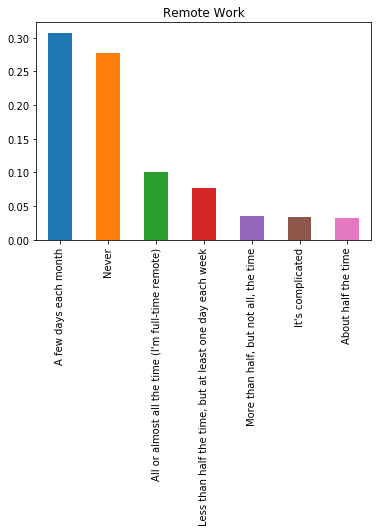

In [4]:
remote_vals = df.HomeRemote.value_counts()#Provide a pandas series of the counts for each HomeRemote status

# The below should be a bar chart of the proportion of individuals in your remote_vals
# if it is set up correctly.

(remote_vals/df.shape[0]).plot(kind="bar");
plt.title("Remote Work");

### Country

Provide a pandas series of the different **Country** values in the dataset.  Store this pandas series in **count_vals**.  If you are correct, you should see a bar chart of the proportion of individuals in each country.

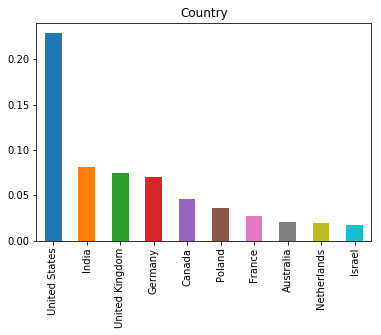

In [5]:
count_vals = df.Country.value_counts()#Provide a pandas series of the counts for each Country

# The below should be a bar chart of the proportion of the top 10 countries for the
# individuals in your count_vals if it is set up correctly.

(count_vals[:10]/df.shape[0]).plot(kind="bar");
plt.title("Country");

### Job Satisfaction Rating

Provide a pandas series of the different **Job Satisfaction Rating** values in the dataset.  Store this pandas series in **satisfaction_vals**.  If you are correct, you should see a bar chart of the proportion of individuals in each country.

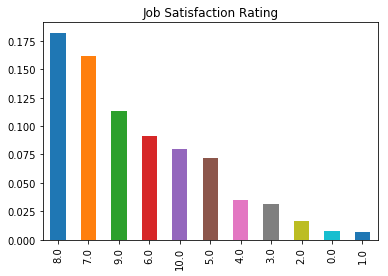

In [6]:
satisfaction_vals = df.JobSatisfaction.value_counts()#Provide a pandas series of the counts 


(satisfaction_vals/df.shape[0]).plot(kind="bar");
plt.title("Job Satisfaction Rating");

### Quesion 1: What is the relation between Job Satisfaction Rating and Country?

In [7]:
df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,19102.000000,16102.000000,15253.000000,7721.000000,13452.000000,5009.000000,818.000000
mean,9551.500000,7.343932,7.000721,3.685922,8.357865,58341.398571,32231.521687
std,5514.416757,1.919330,2.128648,7.330691,1.405546,40753.384986,28543.877274
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4776.250000,6.000000,6.000000,0.000000,8.000000,27956.989247,4716.459735
50%,9551.500000,8.000000,7.000000,1.000000,8.000000,51612.903226,29784.946237
75%,14326.750000,9.000000,8.000000,3.000000,9.000000,83333.333333,50000.000000
max,19102.000000,10.000000,10.000000,40.000000,10.000000,195000.000000,120000.000000


In [8]:
# percentage of data that are missing values
df['JobSatisfaction'].isnull().mean() 

0.20149722542142184

In [9]:
## data grouped by country to get the average of job satisfaction
df_satisfaction_groupby_country = df.groupby(['Country']).mean()['JobSatisfaction'].sort_values(ascending=False).dropna()
df_satisfaction_groupby_country.head(10)

Country
Iraq                      10.000000
Virgin Islands (USA)      10.000000
Laos                       9.000000
New Caledonia (French)     9.000000
Guyana                     9.000000
Andorra                    8.500000
Iceland                    8.400000
Panama                     8.333333
Tanzania                   8.333333
Kenya                      8.250000
Name: JobSatisfaction, dtype: float64

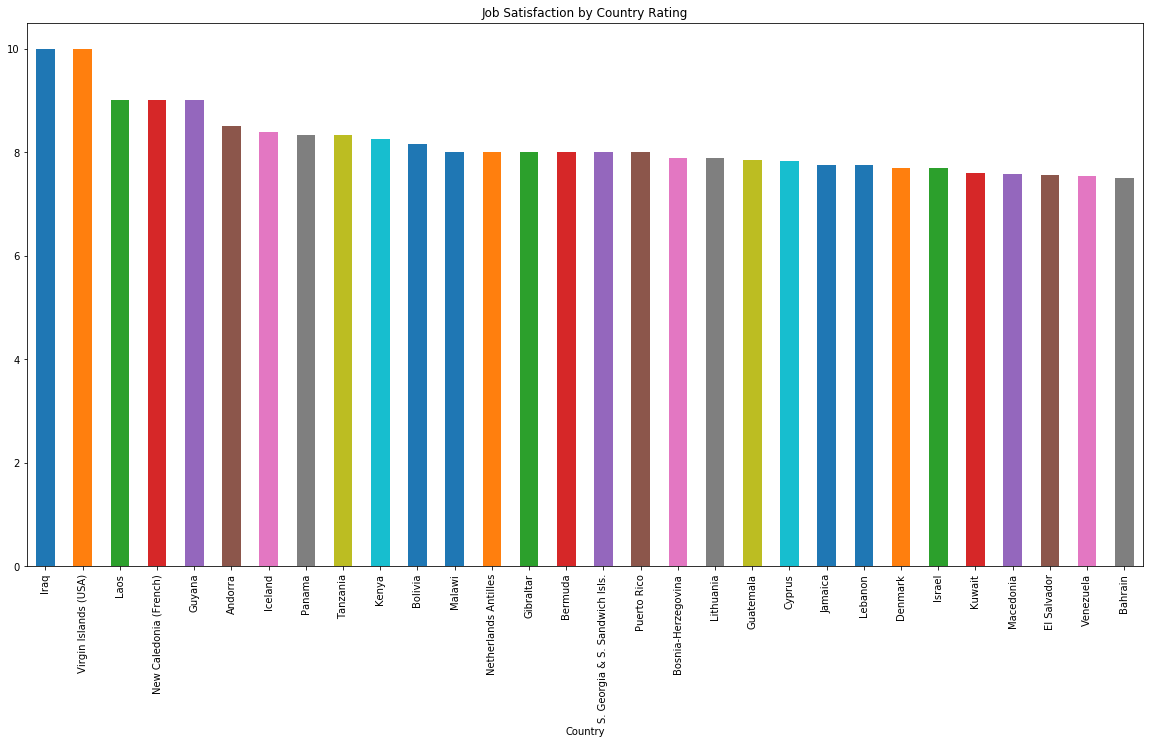

In [10]:
df_satisfaction_groupby_country.head(30).plot(kind="bar", figsize=[20,10]);
plt.title("Job Satisfaction by Country Rating");